In [1]:
%matplotlib inline

In [2]:
import pyathena as pa
from pyathena.set_plt import *

In [3]:
import glob

In [4]:
def norm_log_hist_plot(hist,edges,**kwargs):
    if hist.sum() > 0: 
        plt.bar(edges[:-1],hist,np.diff(edges),align='edge',**kwargs)
def norm_log_line_plot(hist,edges,**kwargs):
    if hist.sum() > 0: 
        plt.plot(edges[:-1]+0.5*np.diff(edges),hist,**kwargs)

In [5]:
def plot_sf_mass_func(sf):

    sp=pa.read_starvtk(sf)

    plt.ylim(0.5,100)
    plt.xlim(2,7)
    plt.yscale('log')

    if len(sp) >0:
        if 'flag' in sp:
            cl=sp[(sp.mass > 0) & (sp.flag > -2)]
            cl_young=sp[(sp.mass > 0) & (sp.flag > -2) & (sp.mage*units['Myr'] < 40)]
            cl_ini=sp[(sp.mass > 0) & (sp.flag == -2)]
        else:
            cl=sp[(sp.mass > 0) & (sp.age < sp.time)]
            cl_young=sp[(sp.mass > 0) & (sp.age < sp.time) & (sp.age*units['Myr'] < 40)]
            cl_ini=sp[(sp.mass > 0) & (sp.age > sp.time)]

        cl_hist,cl_edges=np.histogram(np.log10(cl.mass*units['Msun']),range=[2,7],bins=50)
        cl_young_hist,cl_young_edges=np.histogram(np.log10(cl_young.mass*units['Msun']),range=[2,7],bins=50)
        cl_ini_hist,cl_ini_edges=np.histogram(np.log10(cl_ini.mass*units['Msun']),range=[2,7],bins=50)

        norm_log_hist_plot(cl_ini_hist,cl_ini_edges,alpha=0.5,label='initial clusters',color='C0')
        norm_log_hist_plot(cl_hist,cl_edges,alpha=0.8,label='all new clusters',color='C1')
        norm_log_hist_plot(cl_young_hist,cl_young_edges,label='new young clusters',color='C2')

        plt.text(6.,10,'t={:6.2f}Myr'.format(sp.time[0]*units['Myr']))

In [6]:
def calc_normed_mass_funct(sf,trange=None,bins=50):

    sp=pa.read_starvtk(sf)

    if len(sp) >0:
        if trange == None:
            t1 = 0
            t2 = sp.time[0]
        else:
            t1,t2 = trange
        birth_time = sp.time-sp.age
        if 'flag' in sp:
            cl=sp[(sp.mass > 0) & (sp.flag > -2) & (birth_time > t1) & (birth_time < t2)]
        else:
            cl=sp[(sp.mass > 0) & (birth_time > t1) & (birth_time < t2)]

        cl_hist,cl_edges=np.histogram(np.log10(cl.mass*units['Msun']),range=[2,7],bins=bins)

        return cl_hist, cl_edges, sp.time[0]*units['Myr']


In [7]:
dirs=glob.glob('{}/R*/starpar'.format(base))
#+glob.glob('{}/R*rst/starpar'.format(base))+glob.glob('{}/R*B1/starpar'.format(base))
ids=[]
for dd in dirs:
    ids.append(dd.split('/')[-2])
print ids
#pid='R2_4pc_noacc_largebox'
#ids=['R2_4pc_noacc_largebox']

['R2_2pc_newacc', 'R8_8pc_rst_noFUV', 'R2_2pc_newacc2', 'R16_16pc_metal', 'R16_8pc_metal', 'R4_2pc_metal', 'R4_4pc_rst_from_ng2', 'R2_2pc_nograv', 'R2_2pc_B2', 'R4_4pc_B2', 'R4_4pc_metal', 'R2_2pc_metal', 'R2_4pc_metal', 'R2_4pc_B2_LB_noru', 'R8_8pc_hydro', 'R8_8pc_metal_hydro', 'R2_1pc_metal', 'R4_4pc_nograv2', 'R2_2pc_nograv_largebox', 'R2_2pc_rst_from_ng', 'R8_8pc_metal', 'R4_4pc_newacc', 'RPS_8pc_ICM2_newacc', 'R8_8pc_rst_hydro', 'R2_1pc_newacc', 'R8_4pc_newacc', 'R8_16pc_newacc', 'R2_2pc_rst', 'R8_8pc_rst_noFeedback', 'R8_8pc_rst_noSN', 'R8_2pc_rst', 'RPS_4pc_ICM1_newacc', 'RPS_8pc_ICM0_newacc', 'R2_8pc', 'R4_8pc', 'R2_4pc_S300', 'R8_16pc_nograv_b6', 'R8_8pc_rst_noext', 'R4_4pc_rst', 'RPS_8pc_ICM3_newacc', 'R2_4pc_B2_largebox', 'RPS_4pc_ICM2_newacc', 'R2_4pc_new', 'R2_4pc_nograv', 'R4_4pc_nograv', 'R2_2pc_newacc_largebox', 'R4_2pc_newacc', 'R4_4pc_newacc_largebox', 'R2_4pc_newacc_largebox', 'R2_2pc_B1', 'R2_4pc_B1', 'R8_8pc_newacc', 'RPS_8pc_noICM_newacc', 'RPS_8pc_ICM1_newacc', '

In [9]:
for pid in ids:
    starfiles=glob.glob('{}{}/starpar/{}.*.starpar.vtk'.format(base,pid,pid))
    png_files=glob.glob('{}{}/starpar/{}.*.starpar.massfunc.png'.format(base,pid,pid))
    nf1=len(starfiles)
    nf2=len(png_files)
    starfiles.sort()
    print pid, nf1, nf2
    if nf1 > nf2:
        for sf in starfiles[nf2:]:
            plt.clf()
            print sf
            plot_sf_mass_func(sf)
            plt.legend()
            plt.savefig('{}massfunc.png'.format(sf.replace('vtk','')))
        

R2_2pc_newacc 134 134
R8_8pc_rst_noFUV 343 343
R2_2pc_newacc2 135 135
R16_16pc_metal 532 532
R16_8pc_metal 262 262
R4_2pc_metal 312 312
R4_4pc_rst_from_ng2 197 197
R2_2pc_nograv 207 207
R2_2pc_B2 336 336
R4_4pc_B2 401 401
R4_4pc_metal 401 401
R2_2pc_metal 343 343
R2_4pc_metal 470 470
R2_4pc_B2_LB_noru 293 293
R8_8pc_hydro 564 564
R8_8pc_metal_hydro 551 551
R2_1pc_metal 326 326
R4_4pc_nograv2 401 401
R2_2pc_nograv_largebox 83 83
R2_2pc_rst_from_ng 66 66
R8_8pc_metal 701 701
R4_4pc_newacc 271 271
RPS_8pc_ICM2_newacc 251 251
R8_8pc_rst_hydro 416 416
R2_1pc_newacc 120 120
R8_4pc_newacc 675 675
R8_16pc_newacc 701 701
R2_2pc_rst 102 102
R8_8pc_rst_noFeedback 341 341
R8_8pc_rst_noSN 416 416
R8_2pc_rst 109 109
RPS_4pc_ICM1_newacc 251 251
RPS_8pc_ICM0_newacc 251 251
R2_8pc 751 751
R4_8pc 601 601
R2_4pc_S300 642 642
R8_16pc_nograv_b6 2819 2819
R8_8pc_rst_noext 416 416
R4_4pc_rst 198 198
RPS_8pc_ICM3_newacc 224 224
R2_4pc_B2_largebox 168 168
RPS_4pc_ICM2_newacc 227 227
R2_4pc_new 326 326
R2_4pc_n

['R8_4pc_newacc', 'R4_4pc_newacc2', 'R4_4pc_newacc_largebox2', 'R4_4pc_newacc_largebox', 'R2_4pc_newacc_largebox', 'R2_4pc_noacc_largebox']


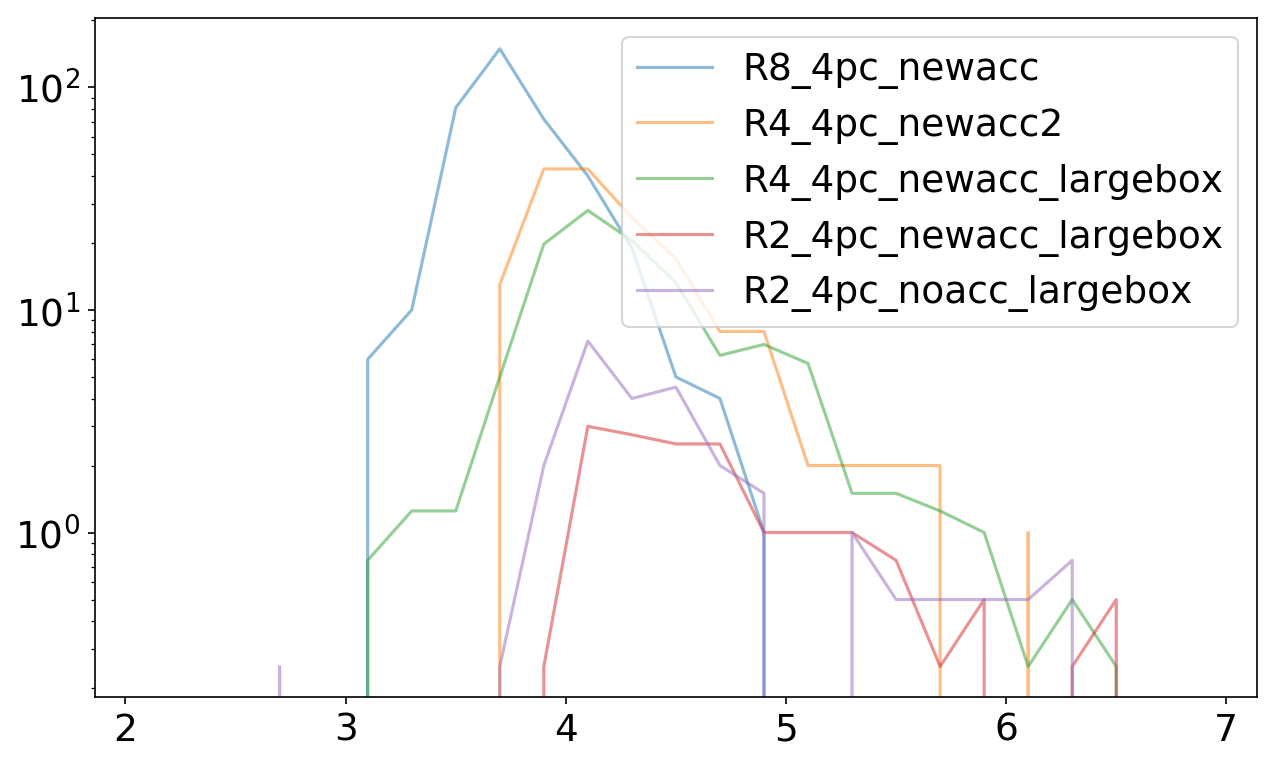

In [39]:
#dirs=glob.glob('{}/R*metal/starpar'.format(base))
dirs=glob.glob('{}/R?_4pc*acc*/starpar'.format(base))
ids=[]
for dd in dirs:
    ids.append(dd.split('/')[-2])
print ids
for pid in ids:

    starfiles=glob.glob('{}{}/starpar/{}.*.starpar.vtk'.format(base,pid,pid))
    starfiles.sort()
    if len(starfiles) > 0:
        sf=starfiles[-1]
        cl_hist,cl_edges,time=calc_normed_mass_funct(sf,bins=25)
        if pid.endswith('largebox'): cl_hist = cl_hist/4.
        norm_log_line_plot(cl_hist,cl_edges,label=pid,alpha=0.5)
        plt.legend()
        plt.yscale('log')